## Importing Libs

In [2]:
!pip install sentence-transformers

  Obtaining dependency information for sentence-transformers from https://files.pythonhosted.org/packages/58/4b/922436953394e1bfda05e4bf1fe0e80f609770f256c59a9df7a9254f3e0d/sentence_transformers-3.0.1-py3-none-any.whl.metadata
  Using cached sentence_transformers-3.0.1-py3-none-any.whl.metadata (10 kB)
  Obtaining dependency information for transformers<5.0.0,>=4.34.0 from https://files.pythonhosted.org/packages/75/35/07c9879163b603f0e464b0f6e6e628a2340cfc7cdc5ca8e7d52d776710d4/transformers-4.44.2-py3-none-any.whl.metadata
  Using cached transformers-4.44.2-py3-none-any.whl.metadata (43 kB)
  Obtaining dependency information for huggingface-hub>=0.15.1 from https://files.pythonhosted.org/packages/b9/8f/d6718641c14d98a5848c6a24d2376028d292074ffade0702940a4b1dde76/huggingface_hub-0.24.6-py3-none-any.whl.metadata
  Using cached huggingface_hub-0.24.6-py3-none-any.whl.metadata (13 kB)
  Obtaining dependency information for tokenizers<0.20,>=0.19 from https://files.pythonhosted.org/packages

In [5]:
import pandas as pd         
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [7]:
file_path = 'Task_1.csv'
df = pd.read_csv(file_path)

## Data Preprocessing

In [8]:
df.sample(15)

,labels,text
9422,ham,U allein in der Stadt?
6064,spam,Herzlichen Glückwunsch! 1 Jahr Spezial-Kino-Pa...
14145,ham,Id onluy est important en allant de l'extérieu...
12250,ham,le soir de la poule. Aller avec une balançoire
13819,ham,Je suis 6 pieds. Nous serons une bonne combina...
13269,ham,Belle Vérité contre la Gravité.. Lisez attenti...
12993,ham,Je ne veux pas entendre la philosophie.
3287,ham,Not to worry. I'm sure you'll get it.
2422,ham,Err... Cud do. I'm going to at 8pm. I haven't...
4279,ham,I've reached home finally...


In [9]:
print(df.isnull().sum())

labels    0
text      0
dtype: int64


In [10]:
df.shape

(16716, 2)

In [11]:
df['labels'] = df['labels'].map({'ham': 0, 'spam': 1})

In [12]:
df.sample(10)

,labels,text
1705,0,What can i do? Might accidant tookplace betwee...


## Sentence Transformer

In [13]:
# Initializing the Sentence Transformer (multilingual model)
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [14]:
# Tokenization and Sentence Embeddings
embeddings = model.encode(df['text'].tolist(), show_progress_bar=True)
y = df['labels'].values

Batches:   0%|          | 0/523 [00:00<?, ?it/s]

## Stratified K-Fold Technique 

In [15]:
# Stratified K-Fold Cross-Validation setup (5 folds)
skf = StratifiedKFold(n_splits=5)

## Logistic Regr

In [16]:
# Logistic Regression Model with GridSearchCV for Hyperparameter Tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}  # Regularization strength
clf = LogisticRegression(max_iter=200)

In [17]:
# GridSearch with Stratified K-Fold Cross-Validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=skf, verbose=1)
grid_search.fit(embeddings, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=200),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy',
             verbose=1)

In [18]:
# Best Hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 10}


In [19]:
# Model Evaluation on Best Model
best_model = grid_search.best_estimator_

## Model Evaluation and Graphs

Fold Accuracy: 0.9880382775119617


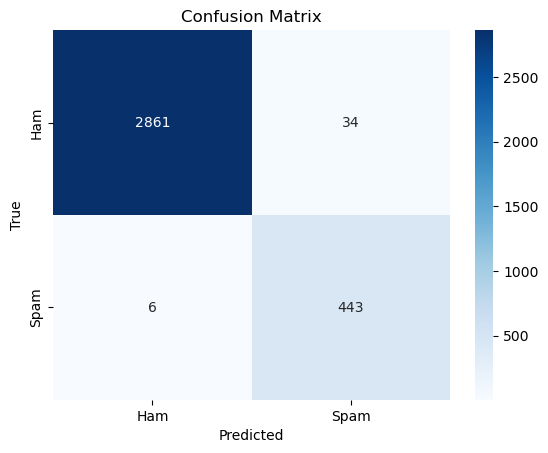

Fold Accuracy: 0.992820819623093


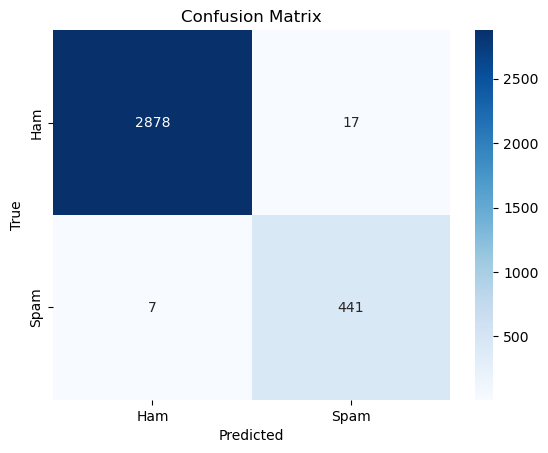

Fold Accuracy: 0.9898294944660485


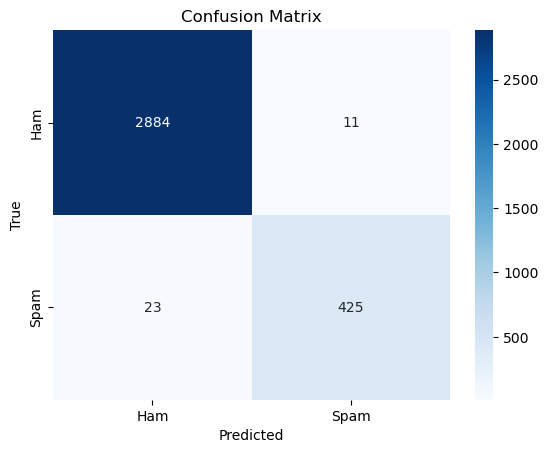

Fold Accuracy: 0.992820819623093


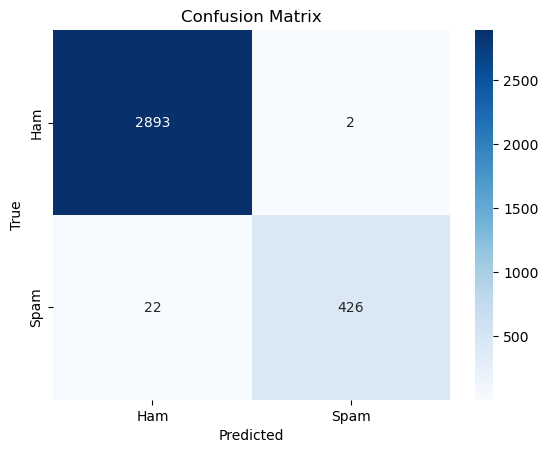

Fold Accuracy: 0.9916242895602752


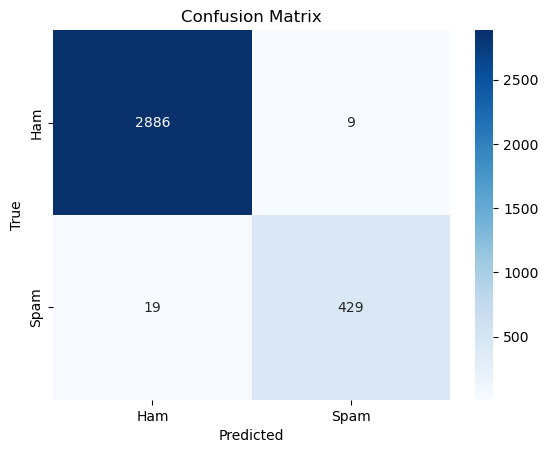

In [20]:
# Stratified K-Fold Evaluation: Average accuracy across all folds
for train_index, test_index in skf.split(embeddings, y):
    X_train, X_test = embeddings[train_index], embeddings[test_index]
    y_train, y_test = y[train_index], y[test_index]

    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Fold Accuracy:", accuracy)

    # Confusion Matrix for the last fold
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()